#Atividade 01

- O código deve executar sem ajustes (então deve buscar arquivos online de base de dados ou apontar para algum diretório público, assim como funções e bibliotecas
  auxiliares devem estar disponíveis no código (se foi necessário baixar alguma lib externa, deixar explícito no código a instalação)) (extremamente importante)
- Código deve ser comentado (descrever funções, ideias, metodologias, etc. Comentem cada seção do código)
- Código deve ser organizado (Utilizem markdowns, criem uma estrutura e sequência lógica, dividam em blocos)
- Código deve ser limpo (utilizem funções para reduzir redundâncias, dêem preferência por parametrização. O código não precisa ser complexo a ponto de reduzir funções
 para 1 linha, por exemplo, mas se você precisa repetir um mesmo bloco de código 3 vezes, pode ser possível melhorar (DRY - Don't Repeat It). Grandes códigos/funções 
podem ser divididos em códigos/funções menores, assim fica muito mais legível e fácil de entender)
- Nomenclatura de variáveis (evitem utilizar a = 0, b = 3, etc. Prefiram dar nomenclaturas que fazem sentido e resumam o que ou pra que vai ser usado. Por exemplo:
 somaFibonacci ou def preprocessarDataset )
- Todos devem participar da produção do código (Na entrega, posso perguntar a ideia por trás do código, ou como alguma coisa foi feita)
- Preparem uma apresentação (Slides, de 15 a 20 minutos) com os pontos fortes e fracos do código, o que foi feito, o que não foi feito mas poderia agregar, pontos
 futuros de melhoria, qual foi a lógica para construção do código, tratamentos, etc. Esse material será apresentado no retorno. Lembrem de colocar referências de todo 
material utilizado para construir o código/apresentação/ideia
- Submissão será via aba de atividades do classroom (enviado o link do colab ou o código no formato .ipynb (notebook) em um arquivo compactado, junto com a apresentação)
- Cuidado com plágio (é bem comum sermos tentados a copiar trechos de código, frases, etc. Mas não é ideal. O importante é que o material seja construído por vocês.
 Plágio é zero)
- A atividade levará em conta a contribuição individual, do time, critérios de avaliação do código e da apresentação (conforme citado acima)
- A base de dados é o CENSUS-INCOME do UCI
- O foco é o  pré-processamento: carregamento da base, tratamento, limpeza, transformação, seleção de features, etc. Tudo o que for necessário para uma base de dados 
ideal para treinamento de um modelo. 


###....:::: Membros ::::....

Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

Vinicius Marques Matos


#Análise Exploratória

O obejtivo central do trabalho o pré-processamento da base de dados CENSUS-INCOME do UCI.

##Importação das bibliotecas

Para a manipulação e análise dos dados utilizaremos como bibliotecas principais Pandas e Numpy. Quanto a visualização gráfica usaremos o Matplotlib e Seaborn.

In [ ]:
# bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurações para os gráficos
pd.set_option("display.precision", 2)
sns.set_style("whitegrid")

##Lendo os dados

Usamos o comando !wget para baixar os dados diretamente da web com um endereço de link de download.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census.tar.gz

--2023-01-14 00:33:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-01-14 00:33:33 ERROR 403: Forbidden.



In [ ]:
#O módulo importado **tarfile** permite ler e gravar arquivos com extensão .tar
import tarfile

file = tarfile.open('census.tar.gz')
file.extractall('./Datasets')
file.close()

##Análise Geral

Conhecendo os dados que a base nos fornece

In [ ]:
#Lendo os dados do arquivo usando o Pandas e armazenando a base de dados na variável census_df
census_df = pd.read_csv("Datasets/census-income.data", header=None)

In [ ]:
#Verificando as características gerais do dataset
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       199523 non-null  int64  
 1   1       199523 non-null  object 
 2   2       199523 non-null  int64  
 3   3       199523 non-null  int64  
 4   4       199523 non-null  object 
 5   5       199523 non-null  int64  
 6   6       199523 non-null  object 
 7   7       199523 non-null  object 
 8   8       199523 non-null  object 
 9   9       199523 non-null  object 
 10  10      199523 non-null  object 
 11  11      199523 non-null  object 
 12  12      199523 non-null  object 
 13  13      199523 non-null  object 
 14  14      199523 non-null  object 
 15  15      199523 non-null  object 
 16  16      199523 non-null  int64  
 17  17      199523 non-null  int64  
 18  18      199523 non-null  int64  
 19  19      199523 non-null  object 
 20  20      199523 non-null  object 
 21  21      19

Até aqui podemos tirar as seguintes conclusões a respeito do banco de dados:

1.   O dataset possui 42 colunas e 199522 linhas;
2.   Não existem dados nulos, mas não quer dizer que não existam dados ausentes;
3.   A maioria dos atributos são do tipo objeto, mas se enquadram como categóricos;
4. O nome dos atributos precisam ser especificados.





In [ ]:
#Conhecendo/analisando os 5 primeiros dados da tabela
census_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [ ]:
#Conhecendo/analisando os últimos 5 últimos dados
census_df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both 65+,Not in universe,Not in universe,Householder,Householder,955.27,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,6418,0,9,Joint one under 65 & one 65+,Not in universe,Not in universe,Householder,Householder,687.19,Nonmover,Nonmover,Nonmover,Yes,Not in universe,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,157,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1923.03,?,?,?,Not in universe under 1 year old,?,6,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,4664.87,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199522,32,Private,42,30,High school graduate,0,Not in universe,Never married,Medical except hospital,Other service,Black,All other,Female,No,Not in universe,Children or Armed Forces,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,1830.11,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94,- 50000.


In [ ]:
# Nomeando as colunas do dataset mediante a validação e análise dos demais arquivos presentes no .tar
census_df.columns=[
"age",
"class of worker",
"detailed industry recode",
"detailed occupation recode",
"education",
"wage per hour",
"enroll in edu inst last wk",
"marital stat",
"major industry code",
"major occupation code",
"race",
"hispanic origin",
"sex",
"member of a labor union",
"reason for unemployment",
"full or part time employment stat",
"capital gains",
"capital losses",
"dividends from stocks",
"tax filer stat",
"region of previous residence",
"state of previous residence",
"detailed household and family stat",
"detailed household summary in household",
"instance weight",
"migration code-change in msa",
"migration code-change in reg",
"migration code-move within reg",
"live in this house 1 year ago",
"migration prev res in sunbelt",
"num persons worked for employer",
"family members under 18",
"country of birth father",
"country of birth mother",
"country of birth self",
"citizenship",
"own business or self employed",
"fill inc questionnaire for veteran's admin",
"veterans benefits",
"weeks worked in year",
"year",
"income_50k"]

In [ ]:
#Conhecendo e visualizando a alteração do título e o tipo de dados de cada coluna do dataset
census_df.dtypes

age                                             int64
class of worker                                object
detailed industry recode                        int64
detailed occupation recode                      int64
education                                      object
wage per hour                                   int64
enroll in edu inst last wk                     object
marital stat                                   object
major industry code                            object
major occupation code                          object
race                                           object
hispanic origin                                object
sex                                            object
member of a labor union                        object
reason for unemployment                        object
full or part time employment stat              object
capital gains                                   int64
capital losses                                  int64
dividends from stocks       

In [ ]:
#Exibe todas as colunas do dataframe.
pd.set_option('display.max_columns', None)

In [ ]:
census_df.head(2)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [ ]:
#Verificando os possíveis valores da coluna income_50k
census_df.income_50k.value_counts()

 - 50000.    187141
 50000+.      12382
Name: income_50k, dtype: int64

In [ ]:
#Convertendo os valores do campo 'income_50k' em booleano vide documentação do dataset
converter = {' - 50000.': False, ' 50000+.': True}
census_df = census_df.replace({'income_50k': converter})

In [ ]:
#Alterandos os tipos de dados das colunas do dataset
# age column
census_df['age'] = census_df['age'].astype('int64')

# class of worker column
census_df['class of worker'] = census_df['class of worker'].astype('category')

# detailed industry recode column
census_df['detailed industry recode'] = census_df['detailed industry recode'].astype('category')

# detailed occupation recode column
census_df['detailed occupation recode'] = census_df['detailed occupation recode'].astype('category')

# education column
census_df['education'] = census_df['education'].astype('category')

# wage per hour column
census_df['wage per hour'] = census_df['wage per hour'].astype('float')

# enroll in edu inst last wk column
census_df['enroll in edu inst last wk'] = census_df['enroll in edu inst last wk'].astype('category')

# marital stat column
census_df['marital stat'] = census_df['marital stat'].astype('category')

# major industry code column
census_df['major industry code'] = census_df['major industry code'].astype('category')

# major occupation code column
census_df['major occupation code'] = census_df['major occupation code'].astype('category')

# race column
census_df['race'] = census_df['race'].astype('category')

# hispanic origin column
census_df['hispanic origin'] = census_df['hispanic origin'].astype('category')

# sex column
census_df['sex'] = census_df['sex'].astype('category')

# member of a labor union column
census_df['member of a labor union'] = census_df['member of a labor union'].astype('category')

# reason for unemployment column
census_df['reason for unemployment'] = census_df['reason for unemployment'].astype('category')

# full or part time employment stat column
census_df['full or part time employment stat'] = census_df['full or part time employment stat'].astype('category')

# capital gains column
census_df['capital gains'] = census_df['capital gains'].astype('float')

# capital losses column
census_df['capital losses'] = census_df['capital losses'].astype('float')

# dividends from stocks column
census_df['dividends from stocks'] = census_df['dividends from stocks'].astype('float')

#tax filer stat
census_df['tax filer stat'] = census_df['tax filer stat'].astype('category')

#region of previous residence
census_df['region of previous residence'] = census_df['region of previous residence'].astype('category')

#state of previous residence
census_df['state of previous residence'] = census_df['state of previous residence'].astype('category')

#detailed household and family stat
census_df['detailed household and family stat'] = census_df['detailed household and family stat'].astype('category')

#detailed household summary in household
census_df['detailed household summary in household'] = census_df['detailed household summary in household'].astype('category')

#instance weight
census_df['instance weight'] = census_df['instance weight'].astype('float')

#migration code-change in msa
census_df['migration code-change in msa'] = census_df['migration code-change in msa'].astype('category')

#migration code-change in reg
census_df['migration code-change in reg'] = census_df['migration code-change in reg'].astype('category')

#migration code-move within reg
census_df['migration code-move within reg'] = census_df['migration code-move within reg'].astype('category')

#live in this house 1 year ago
census_df['live in this house 1 year ago'] = census_df['live in this house 1 year ago'].astype('category')

#migration prev res in sunbelt
census_df['migration prev res in sunbelt'] = census_df['migration prev res in sunbelt'].astype('category')

#num persons worked for employer
census_df['num persons worked for employer'] = census_df['num persons worked for employer'].astype('float')

# family members under 18 
census_df['family members under 18'] = census_df['family members under 18'].astype('category')

# country of birth father
census_df['country of birth father'] = census_df['country of birth father'].astype('category')

# country of birth mother  
census_df['country of birth mother'] = census_df['country of birth mother'].astype('category')

# country of birth self  
census_df['country of birth self'] = census_df['country of birth self'].astype('category')

# citizenship
census_df['citizenship'] = census_df['citizenship'].astype('category')

# own business or self employed
census_df['own business or self employed'] = census_df['own business or self employed'].astype('float')

# fill inc questionnaire for veteran's admin
census_df["fill inc questionnaire for veteran's admin"] = census_df["fill inc questionnaire for veteran's admin"].astype('category')

# veterans benefits
census_df['veterans benefits'] = census_df['veterans benefits'].astype('int64')

# weeks worked in year
census_df['weeks worked in year'] = census_df['weeks worked in year'].astype('float')

# year
census_df['year'] = census_df['year'].astype('int64')

# income_50k
census_df['income_50k'] = census_df['income_50k'].astype('bool')

In [ ]:
#Conferindo a modificação do tipo de cada atributo
census_df.dtypes

age                                              int64
class of worker                               category
detailed industry recode                      category
detailed occupation recode                    category
education                                     category
wage per hour                                  float64
enroll in edu inst last wk                    category
marital stat                                  category
major industry code                           category
major occupation code                         category
race                                          category
hispanic origin                               category
sex                                           category
member of a labor union                       category
reason for unemployment                       category
full or part time employment stat             category
capital gains                                  float64
capital losses                                 float64
dividends 

##Verificação dos dados duplicados

In [ ]:
#Verificação dos dados duplicados na tabela
census_df[census_df.duplicated()]

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income_50k
2784,11,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1008.22,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0.0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0,0.0,94,False
4967,4,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1895.32,?,?,?,Not in universe under 1 year old,?,0.0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0,0.0,95,False
5175,9,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,896.96,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0.0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0,0.0,94,False
5728,12,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,960.76,?,?,?,Not in universe under 1 year old,?,0.0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0,0.0,95,False
5935,0,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1898.59,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0.0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,0,0.0,94,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199414,1,Not in universe,0,0,Children,0.0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0.0,0.0,0.0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1807.67,?,?,?,Not in universe under 1 ye

Após analisar e identificar os dados duplicados, decidiu-se por não remover os dados duplicados, já que não há garantia de que os dados tratam da mesma pessoa (falta de uma primary key).

##Verificação dos dados nulos

O Pandas possui a função isnull() que retorna True para as células não preenchidas do dataset, e False para as preenchidas

In [ ]:
census_df.isnull()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income_50k
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
int(True)

1

In [ ]:
int(False)

0

Se for feito a soma dos elementos de cada coluna consegue se obter a quantidade de elementos vazios em cada coluna

In [ ]:
#Visualizando número de células vazias em cada coluna
census_df.isnull().sum()

age                                           0
class of worker                               0
detailed industry recode                      0
detailed occupation recode                    0
education                                     0
wage per hour                                 0
enroll in edu inst last wk                    0
marital stat                                  0
major industry code                           0
major occupation code                         0
race                                          0
hispanic origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
dividends from stocks                         0
tax filer stat                                0
region of previous residence            

Apesar de não conter dados nulos, foram percebidos caracteres especiais (?)

In [ ]:
#Conferindo caracteres especiais
census_df.isin([' ?']).sum()

age                                               0
class of worker                                   0
detailed industry recode                          0
detailed occupation recode                        0
education                                         0
wage per hour                                     0
enroll in edu inst last wk                        0
marital stat                                      0
major industry code                               0
major occupation code                             0
race                                              0
hispanic origin                                   0
sex                                               0
member of a labor union                           0
reason for unemployment                           0
full or part time employment stat                 0
capital gains                                     0
capital losses                                    0
dividends from stocks                             0
tax filer st

Substituição do caracter especial (?) por "Not in universe"

In [ ]:
census_df.replace(' ?', ' Not in universe', inplace=True)

In [ ]:
#Conferindo caracteres especiais
census_df.isin([' Not in universe']).sum()

age                                                0
class of worker                               100245
detailed industry recode                           0
detailed occupation recode                         0
education                                          0
wage per hour                                      0
enroll in edu inst last wk                    186943
marital stat                                       0
major industry code                                0
major occupation code                         100684
race                                               0
hispanic origin                                    0
sex                                                0
member of a labor union                       180459
reason for unemployment                       193453
full or part time employment stat                  0
capital gains                                      0
capital losses                                     0
dividends from stocks                         

## Análise Univariada

In [ ]:
#Verificando quais colunas apresentam menos que 10 registros com valor diferente de ' Not in universe' e que ganhe mais que 50k 

In [ ]:
for column in census_df.columns:
  if(census_df[census_df[column] != ' Not in universe'].income_50k.sum() < 10):
    print(column)

family members under 18


Com essa observação, podemos afirmar que a coluna "family members under 18" não é relevante para a análise.

Remoção da coluna "family members under 18"

In [ ]:
census_df.drop(columns=["family members under 18"], inplace=True)

# Distribuição dos dados

In [ ]:
#Com o describe() podemos iniciar uma análise da distribuição dos atributos quantitativos
census_df.describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.0
mean,34.49,55.43,434.72,37.31,197.53,1740.38,1.96,0.18,1.51,23.17,94.5
std,22.31,274.90,4697.53,271.90,1984.16,993.77,2.37,0.55,0.85,24.41,0.5
min,0.00,0.00,0.00,0.00,0.00,37.87,0.00,0.00,0.00,0.00,94.0
25%,15.00,0.00,0.00,0.00,0.00,1061.62,0.00,0.00,2.00,0.00,94.0
50%,33.00,0.00,0.00,0.00,0.00,1618.31,1.00,0.00,2.00,8.00,94.0
75%,50.00,0.00,0.00,0.00,0.00,2188.61,4.00,0.00,2.00,52.00,95.0
max,90.00,9999.00,99999.00,4608.00,99999.00,18656.30,6.00,2.00,2.00,52.00,95.0


De modo geral concluimos que:

Onde existem valores, pode-se observar uma proximidade entre a média e mediana, sendo bem distribuidos. É destacado a presença para os outliers, e bastante valores zerados.

In [ ]:
#Utilizando o describe() para análise da distribuição dos atributos qualitativos
census_df.describe(include=['category','bool']) 

,class of worker,detailed industry recode,detailed occupation recode,education,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veteran's admin,income_50k
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,52,47,17,3,7,24,15,5,10,2,3,6,8,6,6,50,38,8,9,8,9,3,3,43,43,43,5,3,2
top,Not in universe,0,0,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Householder,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,False
freq,100245,100684,100684,48407,186943,86485,100684,100684,167365,171907,103984,180459,193453,123769,75094,183750,184458,53248,75475,101212,101212,101212,101212,183750,159163,160479,176989,176992,197539,187141


Assim podemos concluir que:

De modo geral, para os atributos categóricos as informações que mais se destacam (top) são referentes ao "Not in universe", considerado como sem dado; 

Em termos de diversidade das informações o atributo "detailed industry recode" é o mais diverso com 52 tipos;

O atributo principal "income_50k" nos retorna que em sua maioria a renda dominante é referente a menos que 50.000.

In [ ]:
#Verificando a quantidade de registros para cada tipo da coluna 'detailed industry recode'

In [ ]:
census_df['detailed industry recode'].value_counts()

0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: detailed industry recode, dtype: int64

In [ ]:
#Verificando a quantidade de registros para cada tipo da coluna 'detailed occupation recode'
census_df['detailed occupation recode'].value_counts()

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
41      1592
44      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: detailed occupation recode, dtype: int64

## Visualização da frequência de cada atributo quantitativo

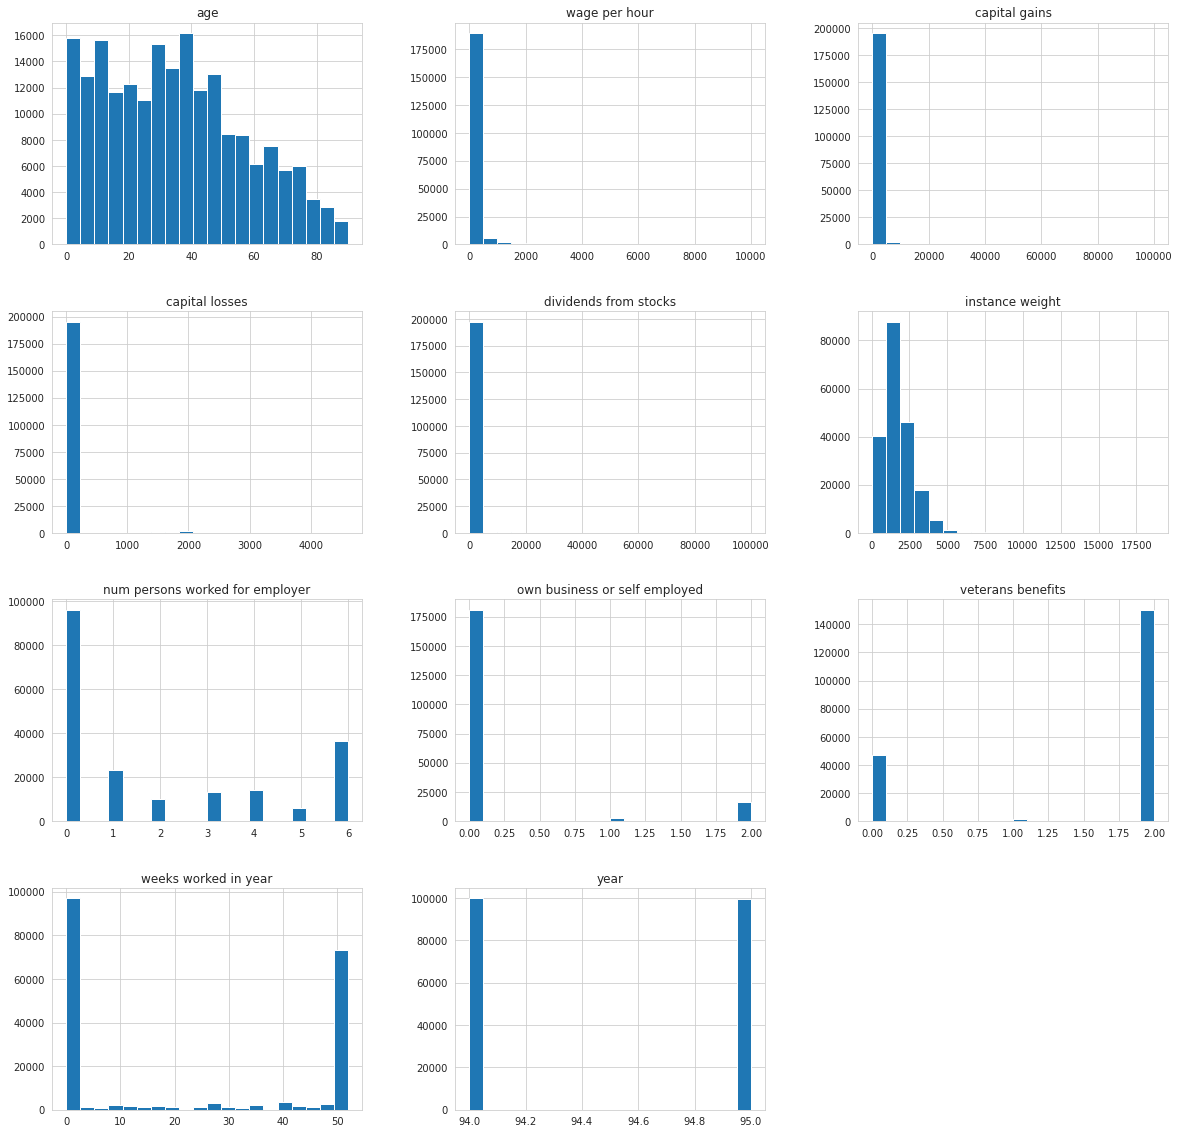

In [ ]:
features = ['age','wage per hour','capital gains','capital losses','dividends from stocks','instance weight','num persons worked for employer','own business or self employed','veterans benefits','weeks worked in year','year']
census_df[features].hist(figsize=(20, 20), bins=20);

Melhorando visualização transformando valores em logaritmo

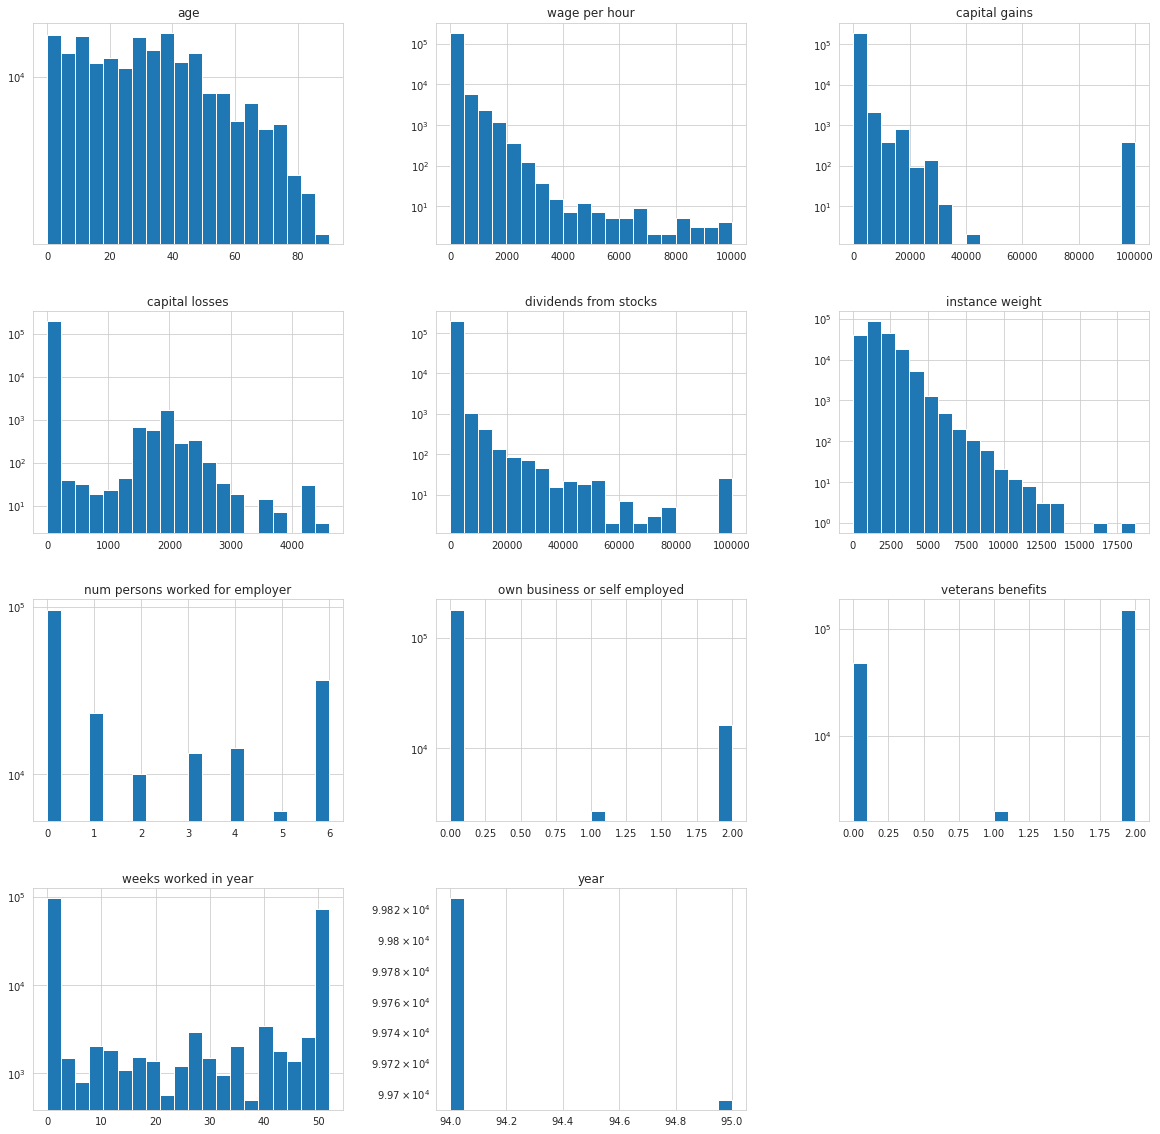

In [ ]:
features = ['age','wage per hour','capital gains','capital losses','dividends from stocks','instance weight','num persons worked for employer','own business or self employed','veterans benefits','weeks worked in year','year']
census_df[features].hist(figsize=(20, 20), bins=20, log=True);

Com o histograma visualizamos a distribuição das frequências para cada atributo.

É visto que os atributos 'age', 'wage per hour', 'capital gains', 'dividends from stocks', 'instance weight' se distribuem de forma decrescente.

Enquanto que 'num persons worked for employer', 'own business or self employed', 'veterans benefits' possuem ocorrências pontuais.

## Análise Multivariada

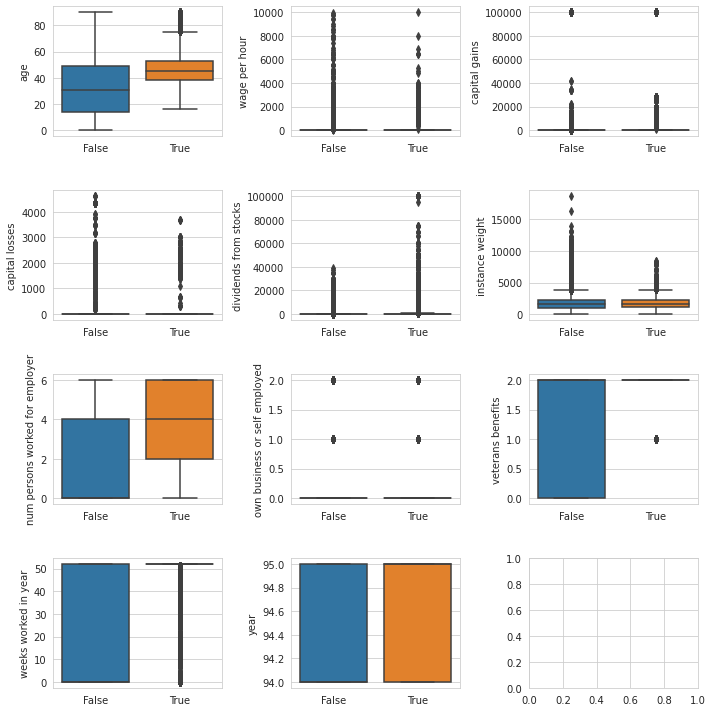

In [ ]:
numerical_columns = ['age','wage per hour','capital gains','capital losses','dividends from stocks','instance weight','num persons worked for employer','own business or self employed','veterans benefits','weeks worked in year','year']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))

for idx, feat in enumerate(numerical_columns):
  ax = axes[int(idx / 3), idx % 3]
  sns.boxplot(x='income_50k', y=feat, data=census_df, ax=ax)
  ax.set_xlabel('')
  ax.set_ylabel(feat)
fig.tight_layout();

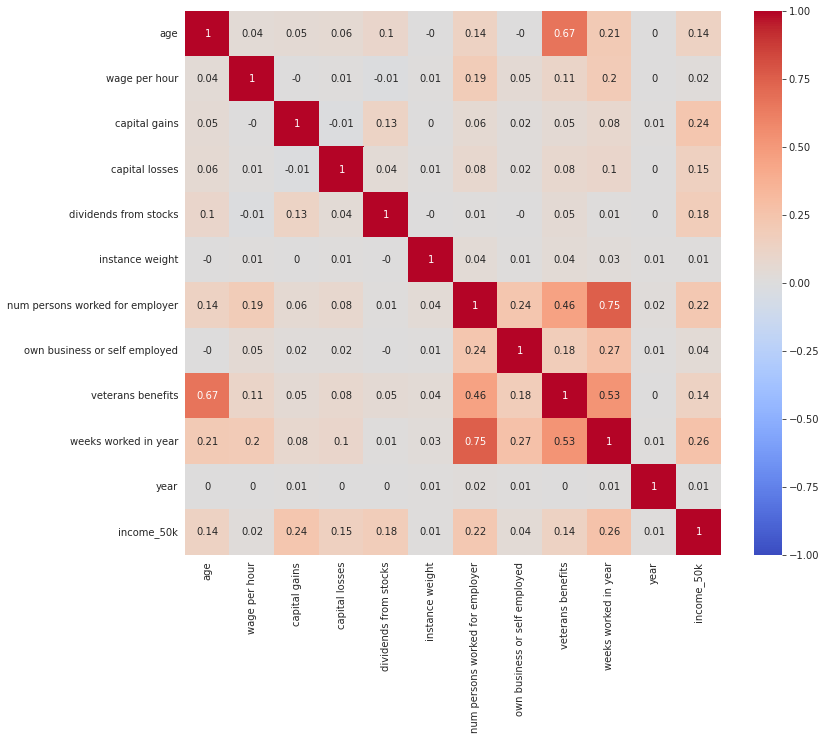

In [ ]:
#Verificando quais atributos quantitativos possuem maior e menor correlação com o atributo income_50k (quanto mais próximo do 1 uma maior correlação)
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(census_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
categorical_features = census_df.select_dtypes(include=['category', 'bool']).columns

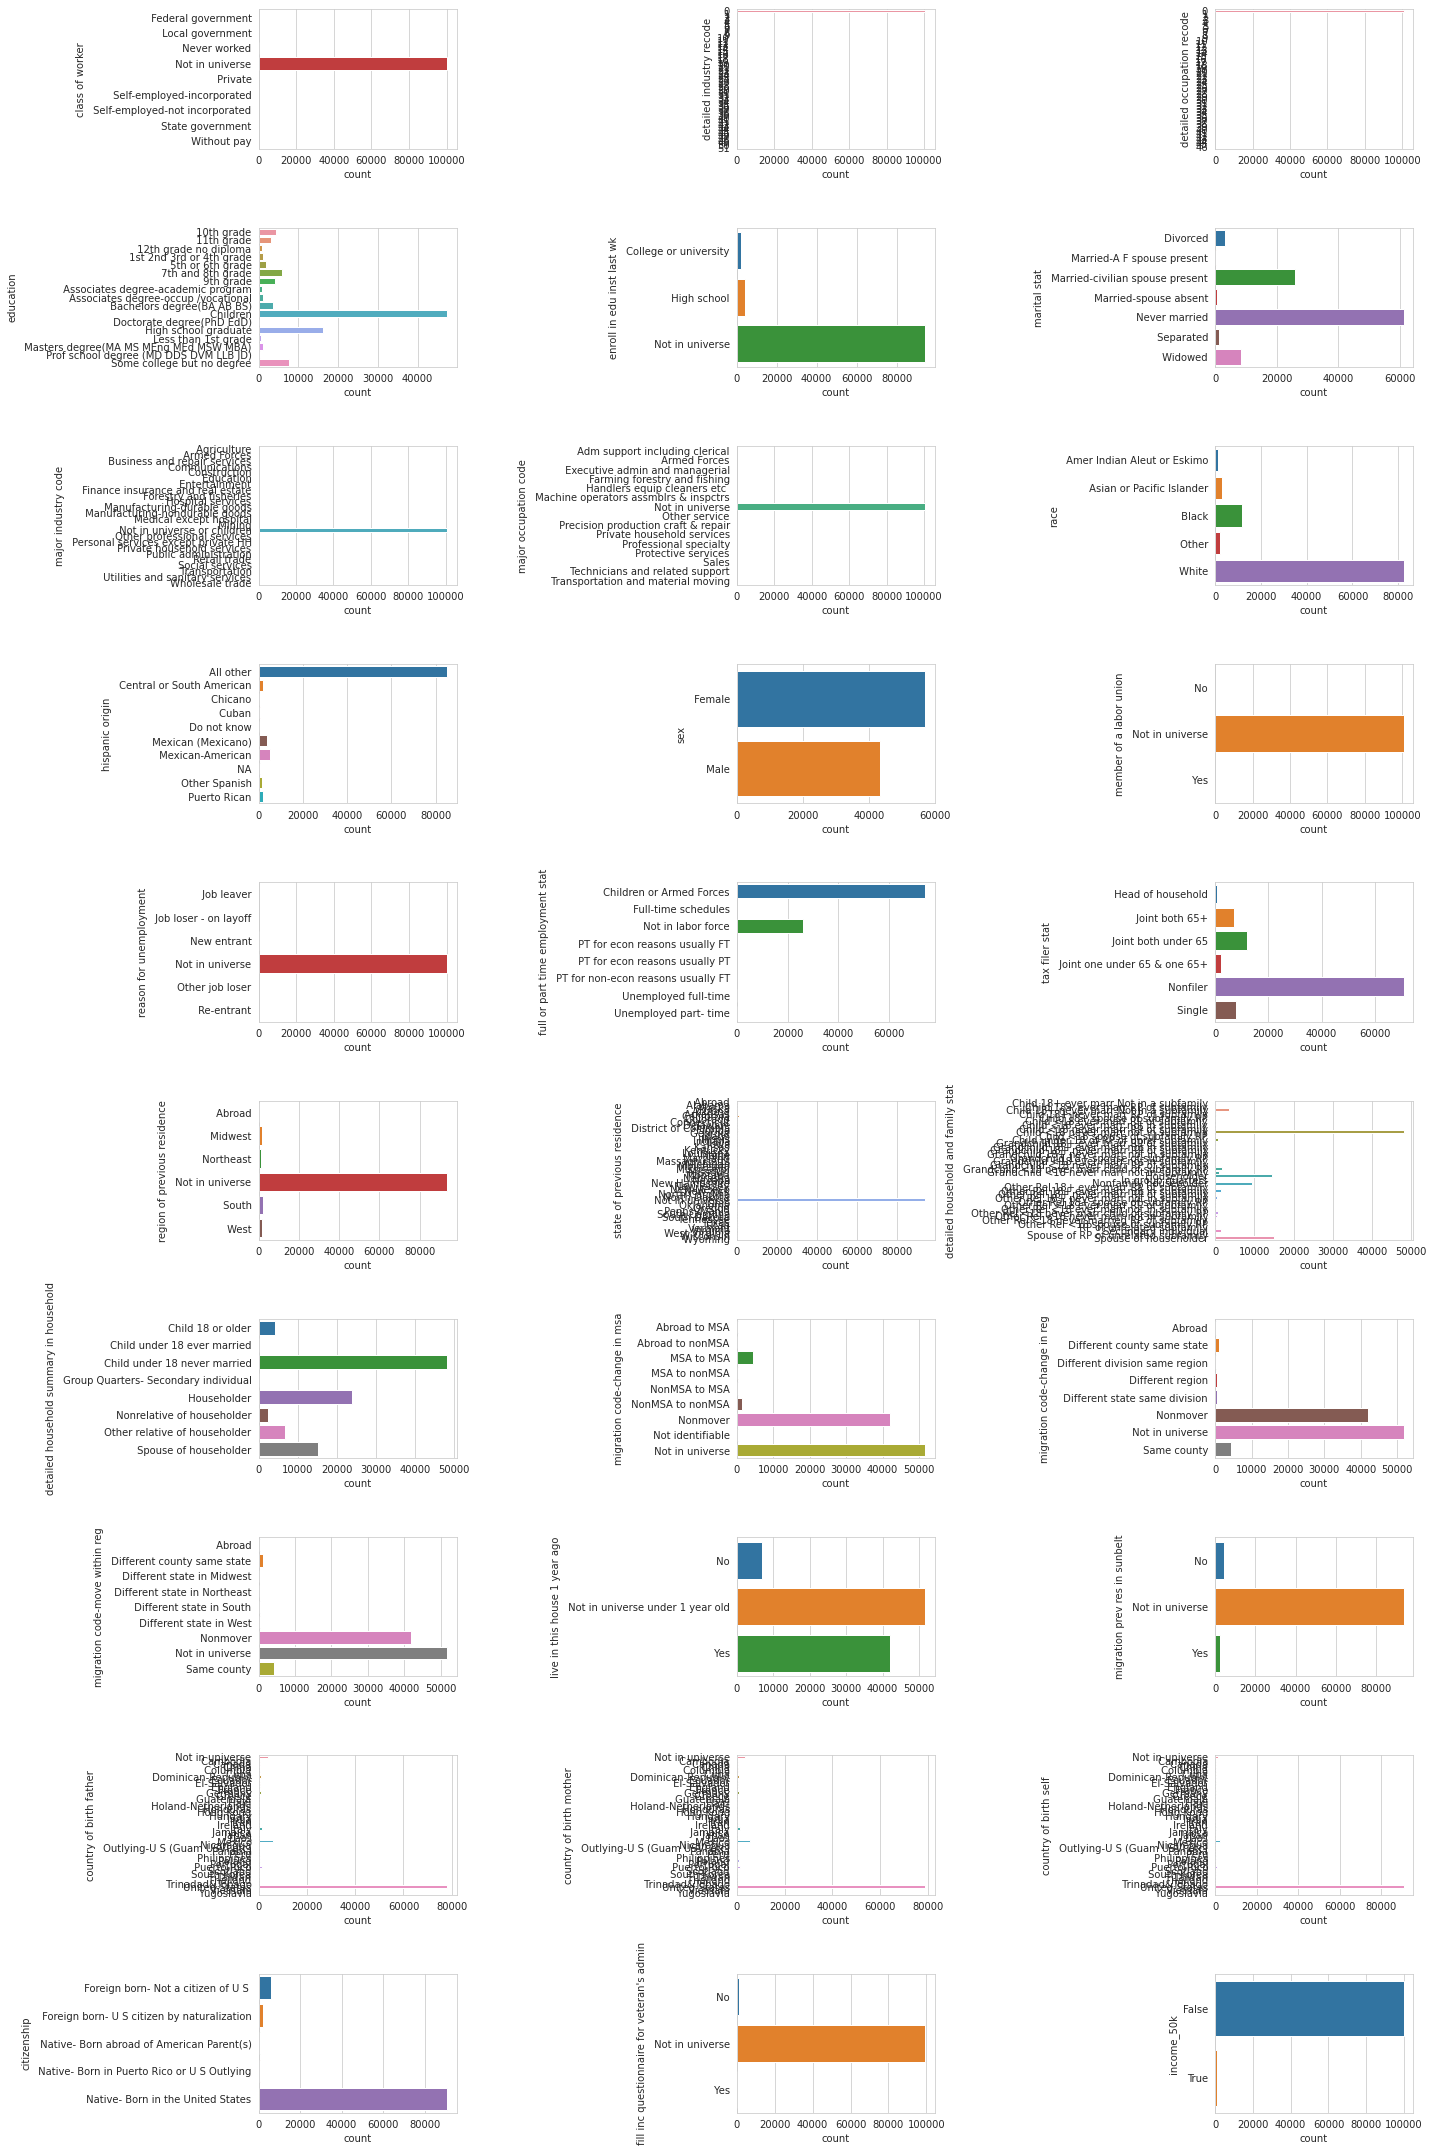

In [ ]:
census_df[categorical_features]
nrows=10
ncols=3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 30))
n = 0
for i in range(nrows):
  for j in range(ncols):
    sns.countplot(y=categorical_features[n], data=census_df[census_df['detailed industry recode']==0], ax=axes[i,j])
    n += 1;
fig.tight_layout();

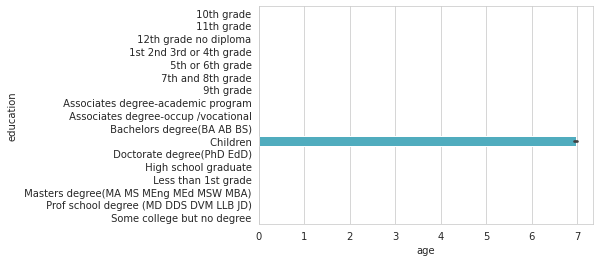

In [ ]:
#Verificando a idade das pessoas com grau de escolaridade 'Children'
sns.barplot(x='age',y='education', data=census_df[census_df['education']==' Children'].value_counts().reset_index())